In [8]:
import os
import json
import h5py
import argparse
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit
from pprint import pprint
#import tinydb as db
#from tinydb.storages import MemoryStorage
import pdb
#import pygama.utils as pgu

import matplotlib
# matplotlib.use('Agg') # when running on cori
import matplotlib.pyplot as plt
plt.style.use('/global/u2/f/fnafis/nfuad.mpl')
from matplotlib.colors import LogNorm
from scipy import signal as sig

from itertools import compress



from pygama.flow import DataGroup
import pygama.lgdo.lh5_store as lh5
import pygama.math.histogram as pgh
#import pygama.analysis.peak_fitting as pgf
import psd_analysis as psd

#import calibration_jdetwiler as cb


from pygama.vis.waveform_browser import WaveformBrowser


dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)
    
'''
fontsize = 20  
def draw_canvas(plt, fontsize=fontsize, xlabel='xlabel', ylabel='count', title='title'):
    plt.figure(figsize=(20,16))
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize*1.5)
    plt.ylabel(ylabel, fontsize=fontsize*1.5)
    plt.legend(fontsize=fontsize)
    plt.title(title, fontsize=fontsize*2)


'''

def draw_canvas(plt, figsize=(12,8), title='Title', xlabel='xlabel', ylabel='count', style='/global/u2/f/fnafis/nfuad.mpl'):
                plt.style.use(style)
                plt.figure(figsize=figsize)
                plt.title(title)
                plt.xlabel(xlabel)
                plt.ylabel(ylabel)
                plt.legend()
    
fileDB = pd.read_hdf('/global/cfs/cdirs/legend/software/KrSTC/data/fileDB.h5')





In [29]:
beginning_cycle = 2019
cycle_range_bkg = [2028,2038, 'bkg', 'run2'] #run 2
#cycle_range_bkg = [2115,2121, 'bkg','run8']
#cycle_range_bkg = [2141,2146, 'bkg', 'run11']
#cycle_range_bkg = [2225,2279, 'bkg', 'run16']
#cycle_range_bkg = [2348,2360, 'bkg', 'run20']
cycle_range_kr = [2039,2058, 'kr','run3'] #gain=1.0
#cycle_range_kr = [2059,2092, 'kr','run4'] #gain>1.0
#cycle_range_kr = [2093,2099, 'kr','run5'] #gain=1.0
#cycle_range_kr = [2147, 2202, 'kr','run12']
#cycle_range = [2203, 2210, 'kry_run13']
#cycle_range_kr = [2280, 2332, 'kr','run17']


runtime_bkg = fileDB['runtime'][cycle_range_bkg[0]-beginning_cycle:cycle_range_bkg[1]+1-beginning_cycle].sum()
runtime_kr = fileDB['runtime'][cycle_range_kr[0]-beginning_cycle:cycle_range_kr[1]+1-beginning_cycle].sum()



lh5_dir = dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']


hit_list_kr = dsp_list[cycle_range_kr[0]-beginning_cycle:cycle_range_kr[1]+1-beginning_cycle]
hit_list_bkg = dsp_list[cycle_range_bkg[0]-beginning_cycle:cycle_range_bkg[1]+1-beginning_cycle]



#hit_list = dsp_list[2039-2019]
'''
columns in file:
        ['trapEmax', 'bl', 'bl_sig', 'A_10', 'AoE', 'packet_id', 'ievt', 'energy',
        'energy_first', 'timestamp', 'crate', 'card', 'channel', 'energy_cal',
        'trapEmax_cal']'''


#df_hit_kr = lh5.load_dfs(hit_list_kr, ['trapEmax', 'bl', 'bl_sig', 'A_10', 'timestamp', 'ToE','ToE_windowed','ToE_50_windowed','ToE_150_windowed','ToE_200_windowed', 'bl_slope', 'AoE', 'triEmax', 'triEmax_windowed', 'triEargmax', 'trapEargmax'], 'ORSIS3302DecoderForEnergy/dsp')
df_hit_kr = lh5.load_dfs(hit_list_kr, ['trapEmax'], 'ORSIS3302DecoderForEnergy/dsp')
#df_hit_bkg = lh5.load_dfs(hit_list_bkg, ['trapEmax', 'bl', 'bl_sig', 'A_10', 'timestamp', 'ToE', 'ToE_windowed','ToE_50_windowed','ToE_150_windowed','ToE_200_windowed', 'bl_slope', 'AoE', 'triEmax', 'triEmax_windowed', 'triEargmax', 'trapEargmax'], 'ORSIS3302DecoderForEnergy/dsp')
df_hit_bkg = lh5.load_dfs(hit_list_bkg, ['trapEmax'], 'ORSIS3302DecoderForEnergy/dsp')



#timestamp is in unit of 10ns.
current_pars = [0.430, -0.09979]
df_hit_kr['trapEmax_cal'] = np.polyval(current_pars, df_hit_kr['trapEmax'])
df_hit_bkg['trapEmax_cal'] = np.polyval(current_pars, df_hit_bkg['trapEmax'])


loading data for /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2280_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2281_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2282_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2283_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2284_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2285_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2286_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2287_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2288_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2289_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2290_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2291_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc2292_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run17_cyc22

In [17]:
bkg_event_count = []
bkg_runtime_count = []
kr_event_count = []
kr_runtime_count = []

In [30]:
bkg_event_count.append(len(df_hit_bkg))
bkg_runtime_count.append(runtime_bkg)
kr_event_count.append(len(df_hit_kr))
kr_runtime_count.append(runtime_kr)

In [35]:
list(zip(bkg_event_count,bkg_runtime_count,kr_event_count,kr_runtime_count))

[(1339947, 286.0755288418333, 2439434, 517.7279617238333),
 (738422, 130.93445632933333, 3951196, 837.6690941743334),
 (589038, 116.389898238, 615903, 132.32105200983335),
 (5641767, 1033.9891628268333, 5090773, 1091.0680336943333),
 (1147849, 254.75973677533332, 4972210, 989.3591123791667)]

In [31]:
print('bkg event rate: ',sum(bkg_event_count)/sum(bkg_runtime_count),'per second')
print('kr event rate: ',sum(kr_event_count)/sum(kr_runtime_count),'per second')

bkg event rate:  5190.038864099266 per second
kr event rate:  4783.862422908107 per second


## Cuts

### total

In [4]:
print('total_bkg:',len(df_hit_bkg))
print('total_kr:',len(df_hit_kr))

total_bkg: 1339947
total_kr: 2439434


### ene_cut

In [5]:
trapEmax_cal_range = [0.0,50.0] #keV

ene_cut_bkg = (df_hit_bkg['trapEmax_cal']>trapEmax_cal_range[0]) & (df_hit_bkg['trapEmax_cal']<trapEmax_cal_range[1])
ene_cut_kr = (df_hit_kr['trapEmax_cal']>trapEmax_cal_range[0]) & (df_hit_kr['trapEmax_cal']<trapEmax_cal_range[1])

print('ene_cut_bkg:',ene_cut_bkg.sum())
print('ene_cut_kr:',ene_cut_kr.sum())

ene_cut_bkg: 210076
ene_cut_kr: 394399


### bl_cut

In [6]:
bl_range = [58000,58200] #ADC

bl_cut_bkg = (df_hit_bkg['bl']>bl_range[0]) & (df_hit_bkg['bl']<bl_range[1])
bl_cut_kr = (df_hit_kr['bl']>bl_range[0]) & (df_hit_kr['bl']<bl_range[1])

print('bl_cut_bkg:',bl_cut_bkg.sum())
print('bl_cut_kr:',bl_cut_kr.sum())

bl_cut_bkg: 1219747
bl_cut_kr: 2240957


### toe_cut

In [7]:
toe_range=[1.0,1.10]

toe_cut_bkg = (df_hit_bkg['ToE']>toe_range[0]) & (df_hit_bkg['ToE']<toe_range[1])
toe_cut_kr = (df_hit_kr['ToE']>toe_range[0]) & (df_hit_kr['ToE']<toe_range[1])

print('toe_cut_bkg:',toe_cut_bkg.sum())
print('toe_cut_kr:',toe_cut_kr.sum())

toe_cut_bkg: 1625
toe_cut_kr: 5856


### triemax cut

In [8]:
triemax_range=[15,16]

triemax_cut_bkg = (df_hit_bkg['triEmax']>triemax_range[0]) & (df_hit_bkg['triEmax']<triemax_range[1])
triemax_cut_kr = (df_hit_kr['triEmax']>triemax_range[0]) & (df_hit_kr['triEmax']<triemax_range[1])

print('triemax_cut_bkg:',triemax_cut_bkg.sum())
print('triemax_cut_kr:',triemax_cut_kr.sum())

triemax_cut_bkg: 1734
triemax_cut_kr: 12361


### ene_bl cut

In [9]:
ene_bl_cut_bkg = ene_cut_bkg & bl_cut_bkg
ene_bl_cut_kr = ene_cut_kr & bl_cut_kr

print('ene_bl_cut_bkg:',ene_bl_cut_bkg.sum())
print('ene_bl_cut_kr:',ene_bl_cut_kr.sum())

ene_bl_cut_bkg: 103543
ene_bl_cut_kr: 218148


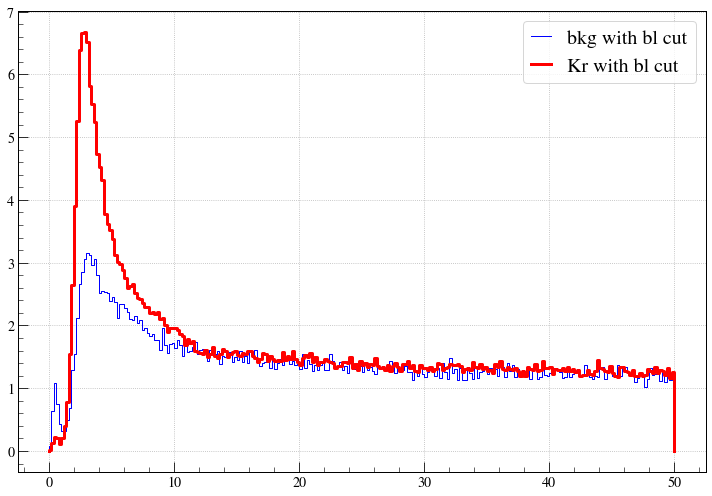

In [10]:
param = 'trapEmax_cal'

elo = 0 #kev
ehi = 50 #kev

n_bins = (ehi-elo)*5 #0.2=1/5 kev/bin

kev_per_bin = (ehi-elo)/n_bins



#draw_canvas(plt, xlabel=param+', '+ str(kev_per_bin)+' kev/bin', ylabel='count', title='bl_cut=['+
#      str(bl_range[0])+','+ str(bl_range[1])+']')



h0, x0, v0 = pgh.get_hist(df_hit_bkg[param][bl_cut_bkg], range=(elo, ehi), bins=n_bins)

h0=h0/runtime_bkg
pgh.plot_hist(h0, x0, c='b', lw=1, label='bkg with bl cut')
#plt.yscale('log')


h2, x2, v2 = pgh.get_hist(df_hit_kr[param][bl_cut_kr], range=(elo, ehi), bins=n_bins)
h2=h2/runtime_kr
pgh.plot_hist(h2,x2, color='r', label='Kr with bl cut')


#plt.yscale('log')
#plt.xlim(0,50)

plt.legend()
#plt.ylim(50,5000)


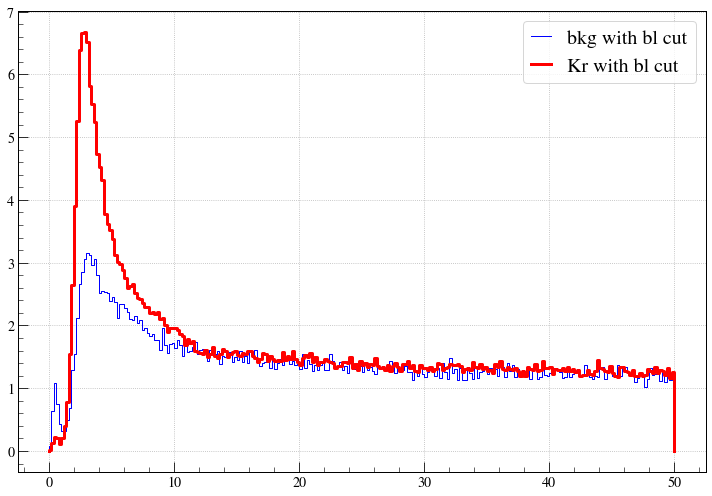

In [11]:
param = 'trapEmax_cal'

elo = 0 #kev
ehi = 50 #kev

n_bins = (ehi-elo)*5 #0.2=1/5 kev/bin

kev_per_bin = (ehi-elo)/n_bins



#draw_canvas(plt, xlabel=param+', '+ str(kev_per_bin)+' kev/bin', ylabel='count', title='bl_cut=['+
#      str(bl_range[0])+','+ str(bl_range[1])+']')



h0, x0, v0 = pgh.get_hist(df_hit_bkg[param][bl_cut_bkg], range=(elo, ehi), bins=n_bins)

h0=h0/runtime_bkg
pgh.plot_hist(h0, x0, c='b', lw=1, label='bkg with bl cut')
#plt.yscale('log')


h2, x2, v2 = pgh.get_hist(df_hit_kr[param][bl_cut_kr], range=(elo, ehi), bins=n_bins)
h2=h2/runtime_kr
pgh.plot_hist(h2,x2, color='r', label='Kr with bl cut')


#plt.yscale('log')
#plt.xlim(0,50)

plt.legend()
#plt.ylim(50,5000)


(0.0, 100.0)

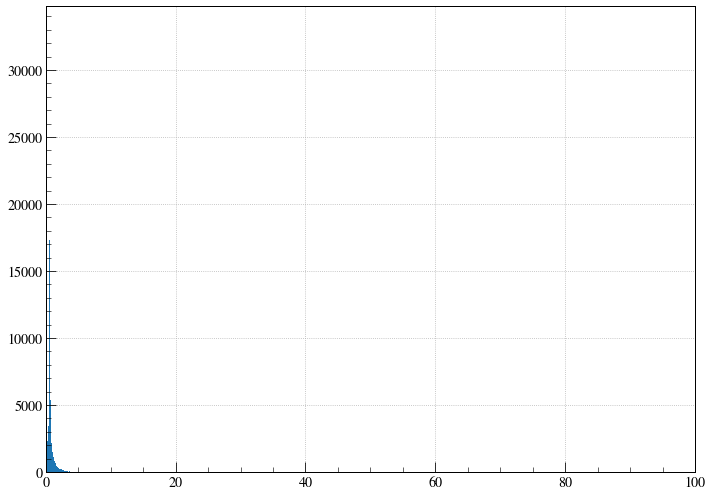

In [12]:
parameter = 'ToE'


#draw_canvas(plt, xlabel=parameter)
plt.hist(df_hit_kr[parameter][ene_bl_cut_kr], bins=10000)
plt.xlim(0,100)

In [13]:
n_bins_triemax = [500,5000]
n_bins_aoe = [100,1000] #?
n_bins_toe = [500,2000]

In [14]:
len(ene_bl_cut_kr)

2439434

/tmp/ipykernel_23622/2189900085.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_23622/2189900085.py:65: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


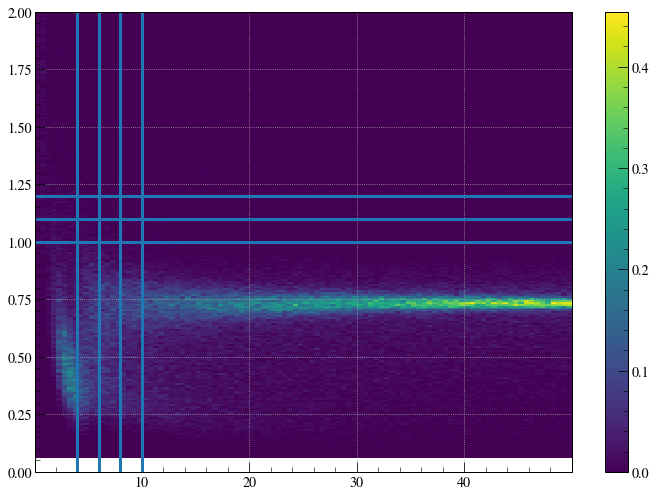

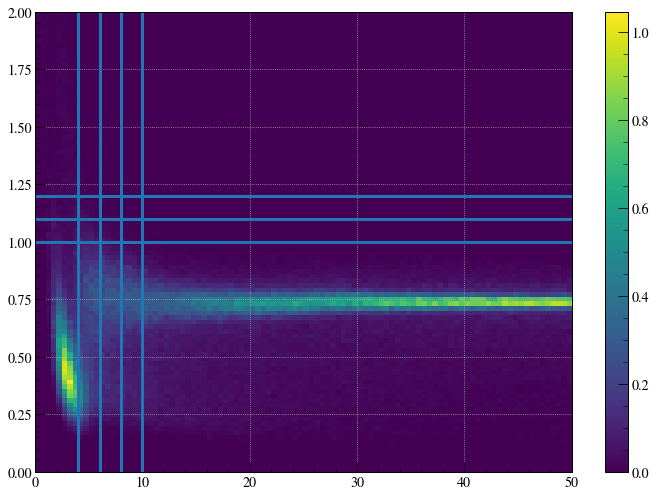

In [15]:
param = 'ToE_200_windowed'


#H = np.histogram2d(d1,d2, bins=[50,500])
H_bkg, xedges, yedges = np.histogram2d(df_hit_bkg['trapEmax_cal'][ene_bl_cut_bkg],df_hit_bkg[param][ene_bl_cut_bkg], 
           bins=[100, 10000])

H_bkg = H_bkg/runtime_bkg
H_bkg = H_bkg.T
#draw_canvas(plt, xlabel='E_cal (keV)', ylabel=param, title='bkg')
#plt.imshow(H_bkg, origin='lower', aspect='auto')
plt.rcParams['figure.figsize'] = (12,8)

plt.style.use('/global/u2/f/fnafis/nfuad.mpl')
plt.imshow(H_bkg, origin='lower',interpolation='nearest',
              extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]], aspect='auto')
plt.colorbar()
#plt.clim(0,0.5)
#plt.ylim(0,50)
plt.ylim(0,2)
#plt.xlim(0,80)
#plt.ylim(0,2)

plt.axvline(4)
plt.axvline(6)
plt.axvline(8)
plt.axvline(10)

plt.axhline(1.0)
plt.axhline(1.10)
plt.axhline(1.20)



parameter = parameter
parameter = 'triEmax'
n_bins = [100,10000] #toe
#range = [0,100]
#n_bins = []

#draw_canvas(plt, xlabel='E_cal', ylabel=parameter, title='bkg')

#H = np.histogram2d(df_hit_bkg['trapEmax_cal'][bl_cut_bkg], df_hit_bkg['ToE'][bl_cut_bkg], bins=[1000,5000])
#H = H/runtime_bkg
#plt.hist2d(df_hit_bkg['trapEmax_cal'][ene_bl_cut_bkg],df_hit_bkg[parameter][ene_bl_cut_bkg], 
          # bins=n_bins, density=True)

#plt.imshow(H[0])
#plt.colorbar()


H_kr, xedges, yedges = np.histogram2d(df_hit_kr['trapEmax_cal'][ene_bl_cut_kr],df_hit_kr[param][ene_bl_cut_kr], 
           bins=[100, 200], range=[[0,50],[0,4]])

H_kr = H_kr/runtime_kr
H_kr = H_kr.T
#draw_canvas(plt, xlabel='E_cal(keV)', ylabel=param, title='kr')
#plt.imshow(H_bkg, origin='lower', aspect='auto')
plt.figure()
#plt.style.use('/global/u2/f/fnafis/nfuad.mpl')
plt.imshow(H_kr, origin='lower',interpolation='nearest',
              extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]], aspect='auto')


plt.colorbar()
#plt.ylim(0,50)
plt.ylim(0,2)
#plt.xlim(0,80)
#plt.ylim(0,2)

#ToE
#plt.xlim(0,50)
#plt.ylim(0,2)


#triemax
#plt.xlim(0,50)
#plt.ylim(0,50)


#plt.clim(0,0.5)
#H[0]
plt.axvline(4)
plt.axvline(6)
plt.axvline(8)
plt.axvline(10)

plt.axhline(1.0)
plt.axhline(1.10)
plt.axhline(1.20)
#plt.axhline()

/tmp/ipykernel_23622/77966664.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


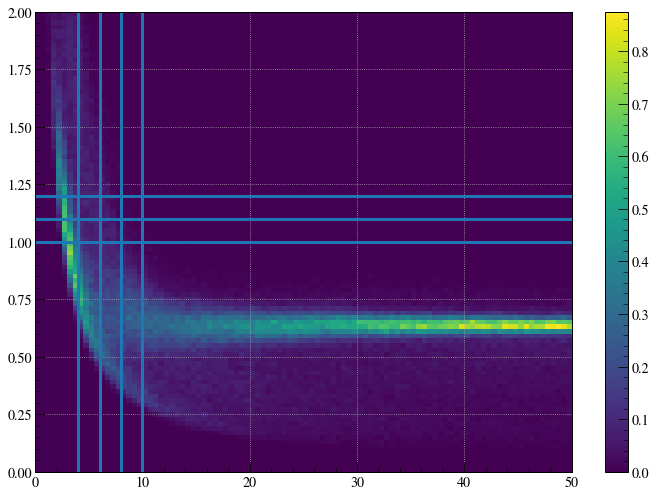

In [16]:
parameter = parameter
parameter = 'triEmax'
n_bins = [100,10000] #toe
#range = [0,100]
#n_bins = []

#draw_canvas(plt, xlabel='E_cal', ylabel=parameter, title='bkg')

#H = np.histogram2d(df_hit_bkg['trapEmax_cal'][bl_cut_bkg], df_hit_bkg['ToE'][bl_cut_bkg], bins=[1000,5000])
#H = H/runtime_bkg
#plt.hist2d(df_hit_bkg['trapEmax_cal'][ene_bl_cut_bkg],df_hit_bkg[parameter][ene_bl_cut_bkg], 
          # bins=n_bins, density=True)

#plt.imshow(H[0])
#plt.colorbar()


H_kr, xedges, yedges = np.histogram2d(df_hit_kr['trapEmax_cal'][ene_bl_cut_kr],df_hit_kr['ToE'][ene_bl_cut_kr], 
           bins=[100, 200], range=[[0,50],[0,4]])

H_kr = H_kr/runtime_kr
H_kr = H_kr.T
#draw_canvas(plt, xlabel='E_cal(keV)', ylabel='ToE', title='kr')
#plt.imshow(H_bkg, origin='lower', aspect='auto')
plt.imshow(H_kr, origin='lower',interpolation='nearest',
              extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]], aspect='auto')
plt.colorbar()
#plt.clim(0,100)
#plt.ylim(0,50)
plt.ylim(0,2)
#plt.xlim(0,80)
#plt.ylim(0,2)

#ToE
#plt.xlim(0,50)
#plt.ylim(0,2)


#triemax
#plt.xlim(0,50)
#plt.ylim(0,50)


#plt.clim(0,0.5)
#H[0]
plt.axvline(4)
plt.axvline(6)
plt.axvline(8)
plt.axvline(10)

plt.axhline(1.0)
plt.axhline(1.10)
plt.axhline(1.20)
#plt.axhline()

/tmp/ipykernel_23622/1924000689.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(df_hit_kr['trapEmax_cal'][ene_bl_cut_kr],
/tmp/ipykernel_23622/1924000689.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


(0.0, 50.0)

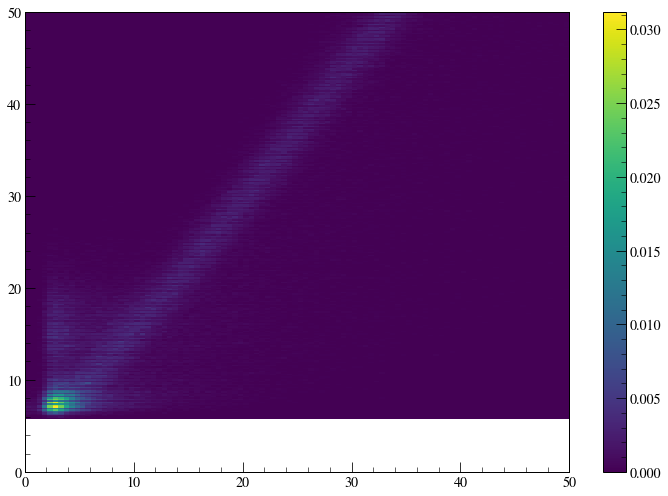

In [17]:
parameter = parameter

#draw_canvas(plt, xlabel='E_cal', ylabel=parameter, title='kr')
plt.hist2d(df_hit_kr['trapEmax_cal'][ene_bl_cut_kr],
           df_hit_kr[parameter][ene_bl_cut_kr], bins=n_bins, density=True)
plt.colorbar()


#ToE
#plt.xlim(0,50)
#plt.ylim(0,2)


#triemax
plt.xlim(0,50)
plt.ylim(0,50)
#plt.clim(0,0.1)

(0.0, 80.0)

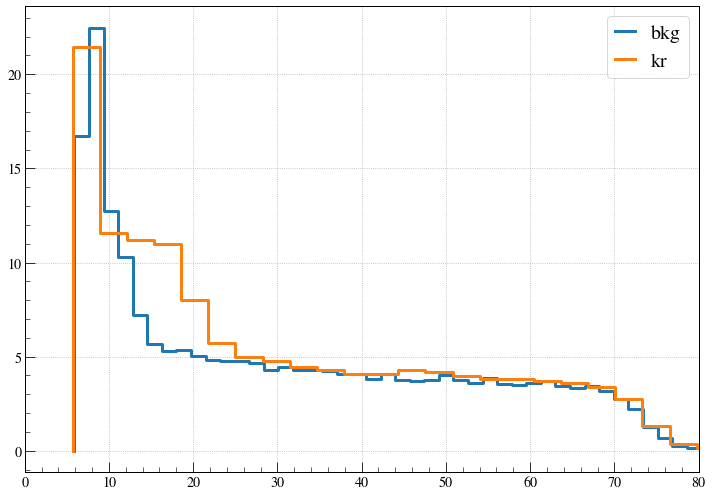

In [18]:
#parameter = 'triEmax'
parameter = parameter
parameter = 'triEmax'
cut_bkg = ene_bl_cut_bkg
cut_kr = ene_bl_cut_kr

#draw_canvas(plt, xlabel=parameter,ylabel='count/runtime/bin_width', title='ene:'+str(trapEmax_cal_range))
n_bins = 500
h_bkg, b_bkg, v_bkg = pgh.get_hist(df_hit_bkg[parameter][cut_bkg], bins=n_bins)
bin_width_bkg = (max(df_hit_bkg[parameter][cut_bkg])-min(df_hit_bkg[parameter][cut_bkg]))/len(b_bkg)
h_bkg = h_bkg/(runtime_bkg*bin_width_bkg)



h_kr, b_kr, v_kr = pgh.get_hist(df_hit_kr[parameter][cut_kr], bins=n_bins)
bin_width_kr = (max(df_hit_kr[parameter][cut_kr])-min(df_hit_kr[parameter][cut_kr]))/len(b_kr)
h_kr = h_kr/(runtime_kr*bin_width_kr)



pgh.plot_hist(h_bkg, b_bkg, label='bkg')
pgh.plot_hist(h_kr, b_kr, label='kr')


plt.legend()
plt.xlim(0,1) #toe
plt.xlim(0,80)  #triemax
#plt.xlim(0,0.6)

In [19]:
print(max(df_hit_bkg[parameter][cut_bkg]),min(df_hit_bkg[parameter][cut_bkg]))
print(max(df_hit_kr[parameter][cut_kr]),min(df_hit_kr[parameter][cut_kr]))



871.28076171875 5.895088195800781
1615.9530029296875 5.698668479919434


(0.0, 2.0)

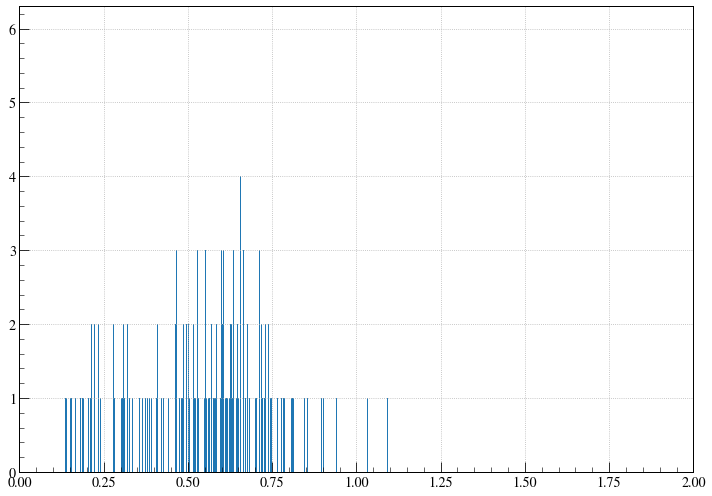

In [20]:
#draw_canvas(plt)
ene_bl_triemax_cut_bkg = ene_cut_bkg & bl_cut_bkg & triemax_cut_bkg
plt.hist(df_hit_bkg['ToE'][ene_bl_triemax_cut_bkg], bins=10000)
plt.xlim(0,2)

## Waveforms

### bkg

Processing parameters: ['bl, bl_sig, bl_slope, bl_int', 'wf_blsub']
Required input parameters: ['waveform']
Copied output parameters: []
Processed output parameters: ['wf_blsub']
['bl, bl_sig, bl_slope, bl_int', 'wf_blsub']
Processing parameters: ['bl, bl_sig, bl_slope, bl_int', 'wf_blsub']
Required input parameters: ['waveform']
Copied output parameters: []
Processed output parameters: ['wf_blsub']
['bl, bl_sig, bl_slope, bl_int', 'wf_blsub']


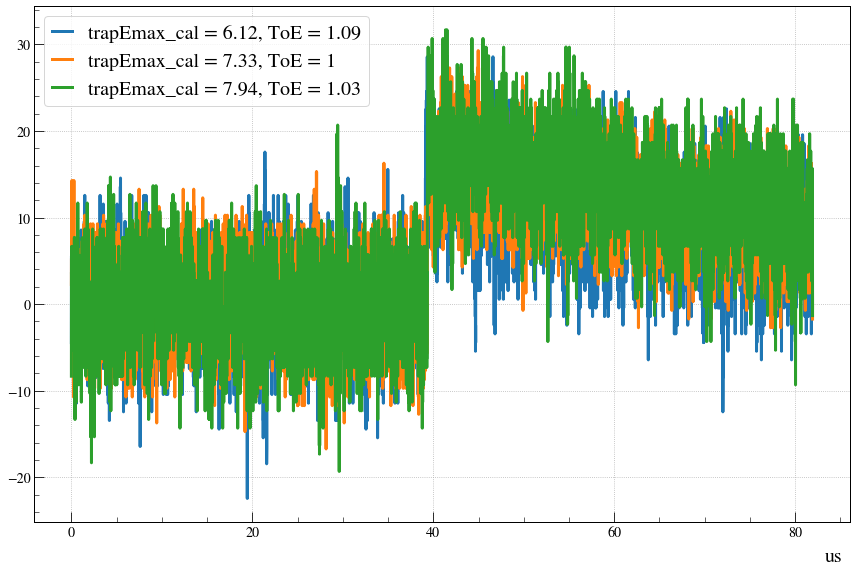

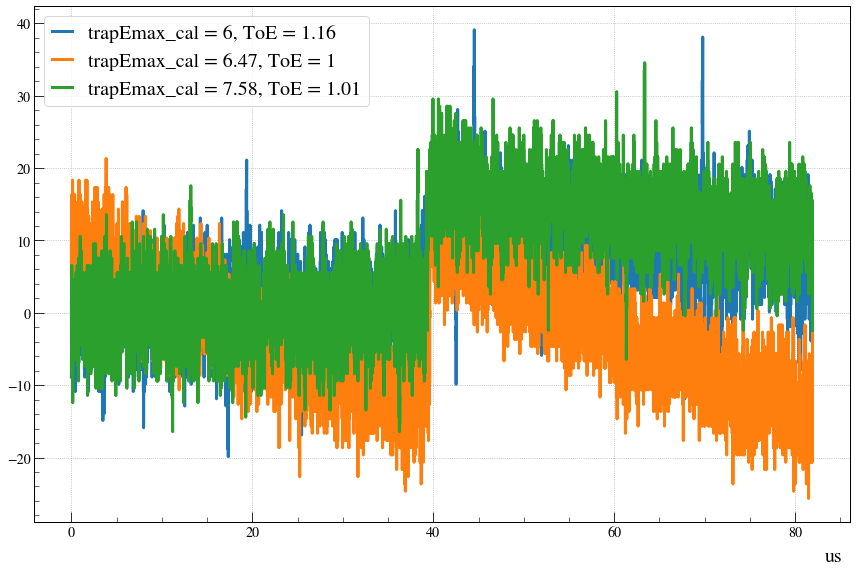

In [21]:
run = '2'

ene_cut_bkg = (df_hit_bkg['trapEmax_cal']>6.0) & (df_hit_bkg['trapEmax_cal']<8.0)
toe_cut_bkg = (df_hit_bkg['ToE']>1.0) & (df_hit_bkg['ToE']<1.2)

cut = ene_cut_bkg & bl_cut_bkg & toe_cut_bkg
legend = (df_hit_bkg['trapEmax_cal'], df_hit_bkg['ToE'])
nwfs = 3

tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
#tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_bkg[0],cycle_range_bkg[1]+1):
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')

#run = '3'
#cyc = 2039

#raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
#dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'



browser_bkg = WaveformBrowser(raw_files, tb_name_raw,
                              dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                             x_unit='us',
                            legend= legend,
                             waveforms=['wf_blsub'],
                              #selection=cut,
                            #x_lim=(38,41)
                             )

cut_indices = list(compress(list(range(len(cut))),cut))
entries_bkg = np.random.choice(cut_indices, size=nwfs).tolist()
#plt.title('bkg')
plt.rcParams['figure.figsize'] = (12,8)
browser_bkg.draw_entry(entries_bkg)
#plt.xlim(35,45)





run = '3'
ene_cut_kr = (df_hit_kr['trapEmax_cal']>6) & (df_hit_kr['trapEmax_cal']<8)
toe_cut_kr = (df_hit_kr['ToE']>1) & (df_hit_kr['ToE']<1.2)
cut = ene_cut_kr & bl_cut_kr & toe_cut_kr
#nwfs = 3
legend = (df_hit_kr['trapEmax_cal'], df_hit_kr['ToE'])

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_kr[0],cycle_range_kr[1]+1):
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')

#run = '3'
#cyc = 2039

#raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
#dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'



browser_kr = WaveformBrowser(raw_files, tb_name_raw,
                             dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                             x_unit='us',
                            legend= legend,
                            waveforms=['wf_blsub'],
                            #x_lim=(38,41)
                            )




cut_indices = list(compress(list(range(len(cut))),cut))
entries_kr = np.random.choice(cut_indices, size=nwfs).tolist()
#plt.title('kr')
plt.rcParams['figure.figsize'] = (12,8)
browser_kr.draw_entry(entries_kr)
#plt.xlim(35,45)

### Plotting savitsky-golay filtered wfs

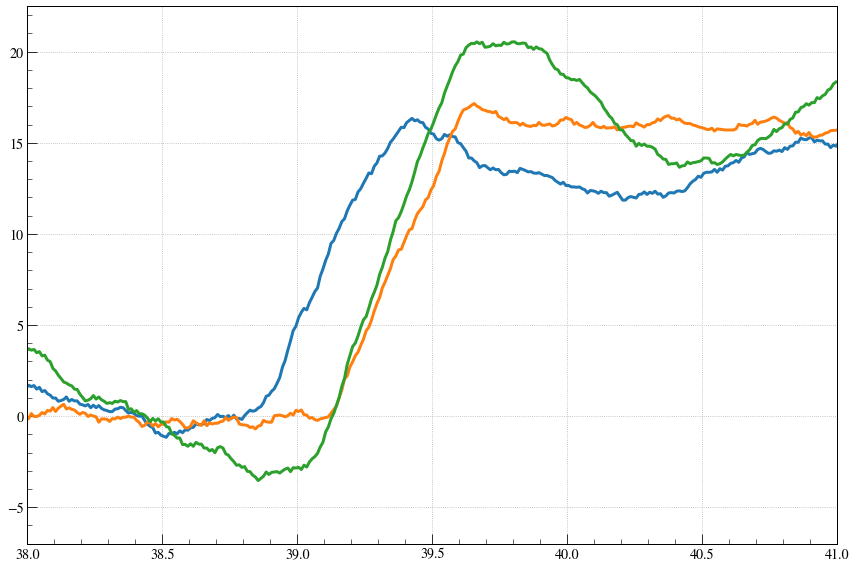

In [22]:
t = browser_bkg.wf_data[0][0][0]
for i in range(nwfs):
    wf = browser_bkg.wf_data[0][i][1]
    wf_filtered = sig.savgol_filter(wf, 51, 1)
    plt.plot(t, wf_filtered)
    plt.xlim(38,41)

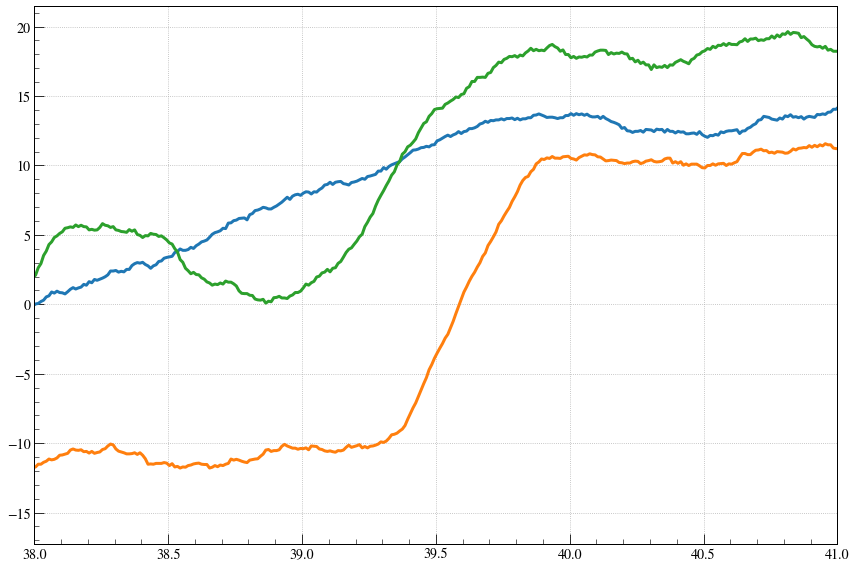

In [23]:
for i in range(nwfs):
    wf = browser_kr.wf_data[0][i][1]
    wf_filtered = sig.savgol_filter(wf, 51, 1)
    plt.plot(t, wf_filtered)
    plt.xlim(38,41)

Processing parameters: []
Required input parameters: []
Copied output parameters: ['waveform']
Processed output parameters: []
[]
[367110, 1303236]
Processing parameters: []
Required input parameters: []
Copied output parameters: ['waveform']
Processed output parameters: []
[]


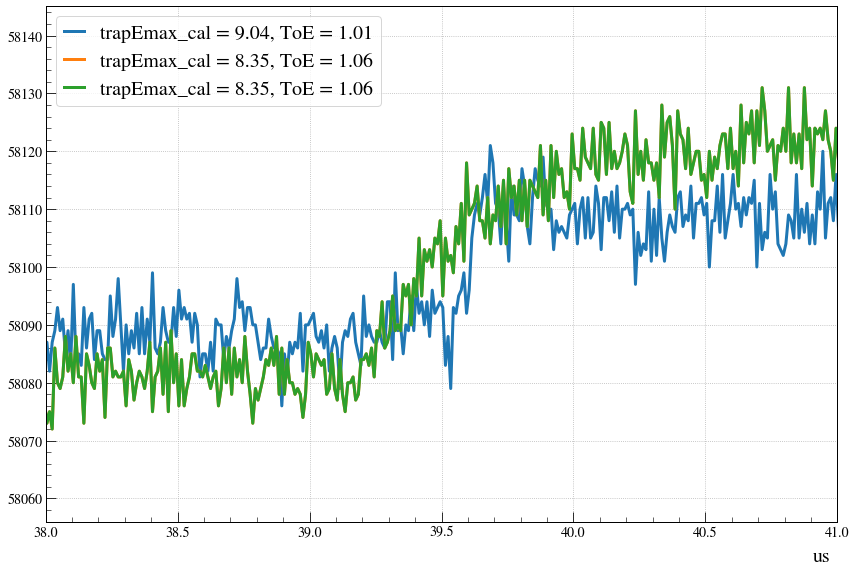

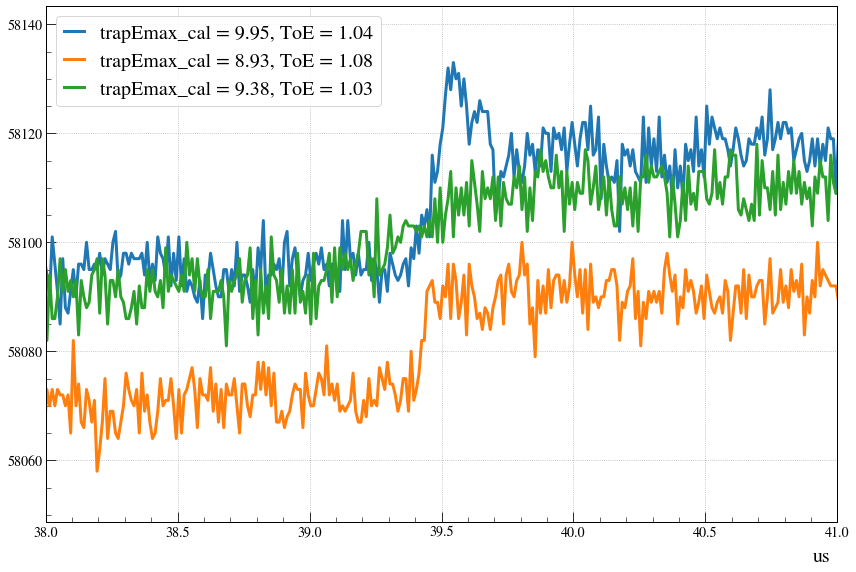

In [24]:
run = '2'

ene_cut_bkg = (df_hit_bkg['trapEmax_cal']>8.0) & (df_hit_bkg['trapEmax_cal']<10.0)
toe_cut_bkg = (df_hit_bkg['ToE']>1) & (df_hit_bkg['ToE']<1.10)

cut = ene_cut_bkg & bl_cut_bkg & toe_cut_bkg
legend = (df_hit_bkg['trapEmax_cal'], df_hit_bkg['ToE'])
nwfs = 3

tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
#tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_bkg[0],cycle_range_bkg[1]+1):
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')

#run = '3'
#cyc = 2039

#raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
#dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'



browser_bkg = WaveformBrowser(raw_files, tb_name_raw,
                              dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                             x_unit='us',
                            legend= legend,
                             #waveforms=['wf_blsub', 'wf_triangle'],
                            x_lim=(38,41))

cut_indices = list(compress(list(range(len(cut))),cut))
entries_bkg = np.random.choice(cut_indices, size=nwfs).tolist()
print(cut_indices[0:10])
plt.rcParams['figure.figsize'] = (12,8)
browser_bkg.draw_entry(entries_bkg)
#plt.xlim(35,45)





run = '3'
ene_cut_kr = (df_hit_kr['trapEmax_cal']>8) & (df_hit_kr['trapEmax_cal']<10.0)
toe_cut_kr = (df_hit_kr['ToE']>1) & (df_hit_kr['ToE']<1.10)
cut = ene_cut_kr & bl_cut_kr & toe_cut_kr
#nwfs = 3
legend = (df_hit_kr['trapEmax_cal'], df_hit_kr['ToE'])

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_kr[0],cycle_range_kr[1]+1):
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')

#run = '3'
#cyc = 2039

#raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
#dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'



browser_kr = WaveformBrowser(raw_files, tb_name_raw,
                             dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                             x_unit='us',
                            legend= legend,
                            #waveforms=['wf_blsub', 'wf_triangle'],
                            x_lim=(38,41))




cut_indices = list(compress(list(range(len(cut))),cut))
entries_kr = np.random.choice(cut_indices, size=nwfs).tolist()
#plt.title('kr')
plt.rcParams['figure.figsize'] = (12,8)
browser_kr.draw_entry(entries_kr)
#plt.xlim(35,45)

### time (cycle) vs trapEmax_cal

/tmp/ipykernel_23622/876535450.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


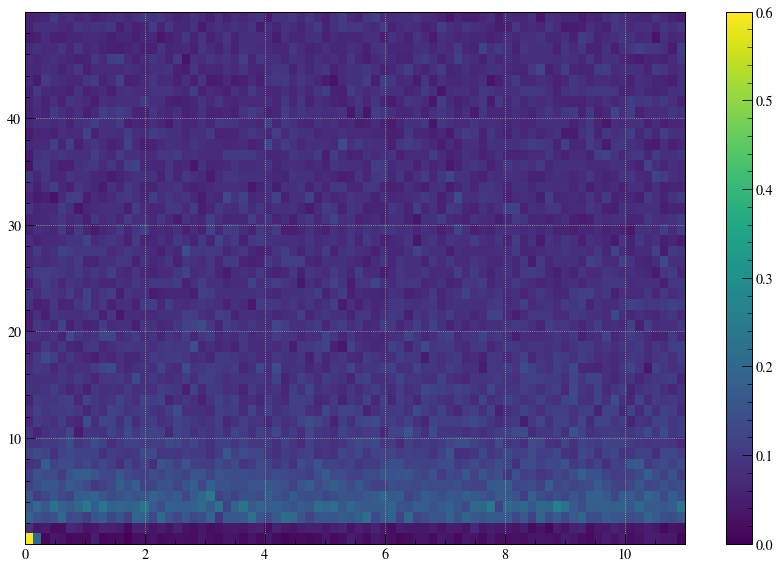

In [25]:
y = df_hit_bkg['trapEmax_cal'][ene_bl_cut_bkg]
x = [i/(len(y)/11) for i in range(len(y))]
H_bkg, xedges, yedges = np.histogram2d(x,y, bins=[80, 50])

H_bkg = H_bkg/runtime_bkg
H_bkg = H_bkg.T
#draw_canvas(plt, xlabel='time (cycles)', ylabel='E_cal (kev)', title='bkg (run 2)')
#plt.imshow(H_bkg, origin='lower', aspect='auto')
plt.imshow(H_bkg, origin='lower',interpolation='nearest',
              extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]], aspect='auto')
plt.colorbar()
plt.clim(0,0.6)

/tmp/ipykernel_23622/3342537328.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


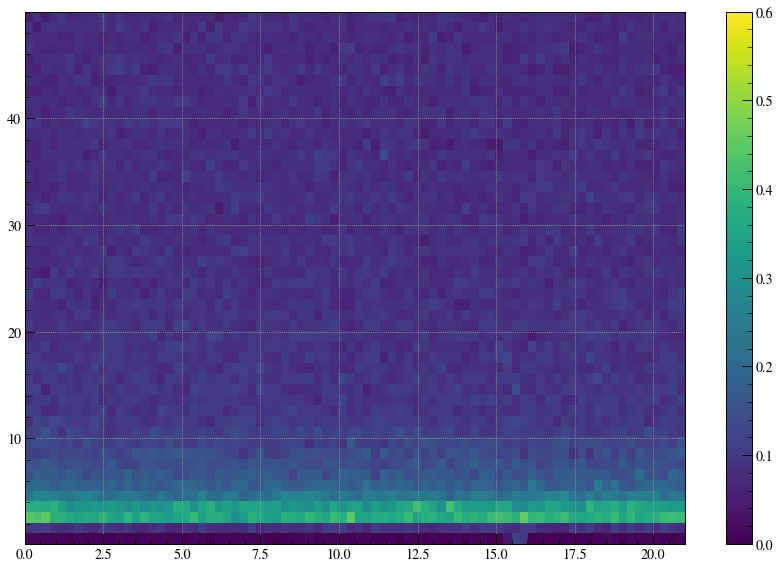

In [26]:
y = df_hit_kr['trapEmax_cal'][ene_bl_cut_kr]
x = [i/(len(y)/21) for i in range(len(y))]
H_kr, xedges, yedges = np.histogram2d(x,y, bins=[80, 50])

H_kr = H_kr/runtime_kr
H_kr = H_kr.T
#draw_canvas(plt, xlabel='time (cycle)', ylabel='E_cal (kev)', title='kr (run 3)')
#plt.imshow(H_bkg, origin='lower', aspect='auto')
plt.imshow(H_kr, origin='lower',interpolation='nearest',
              extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]], aspect='auto')
plt.colorbar()
plt.clim(0,0.6)

## triEargmax


Contains 43.7%


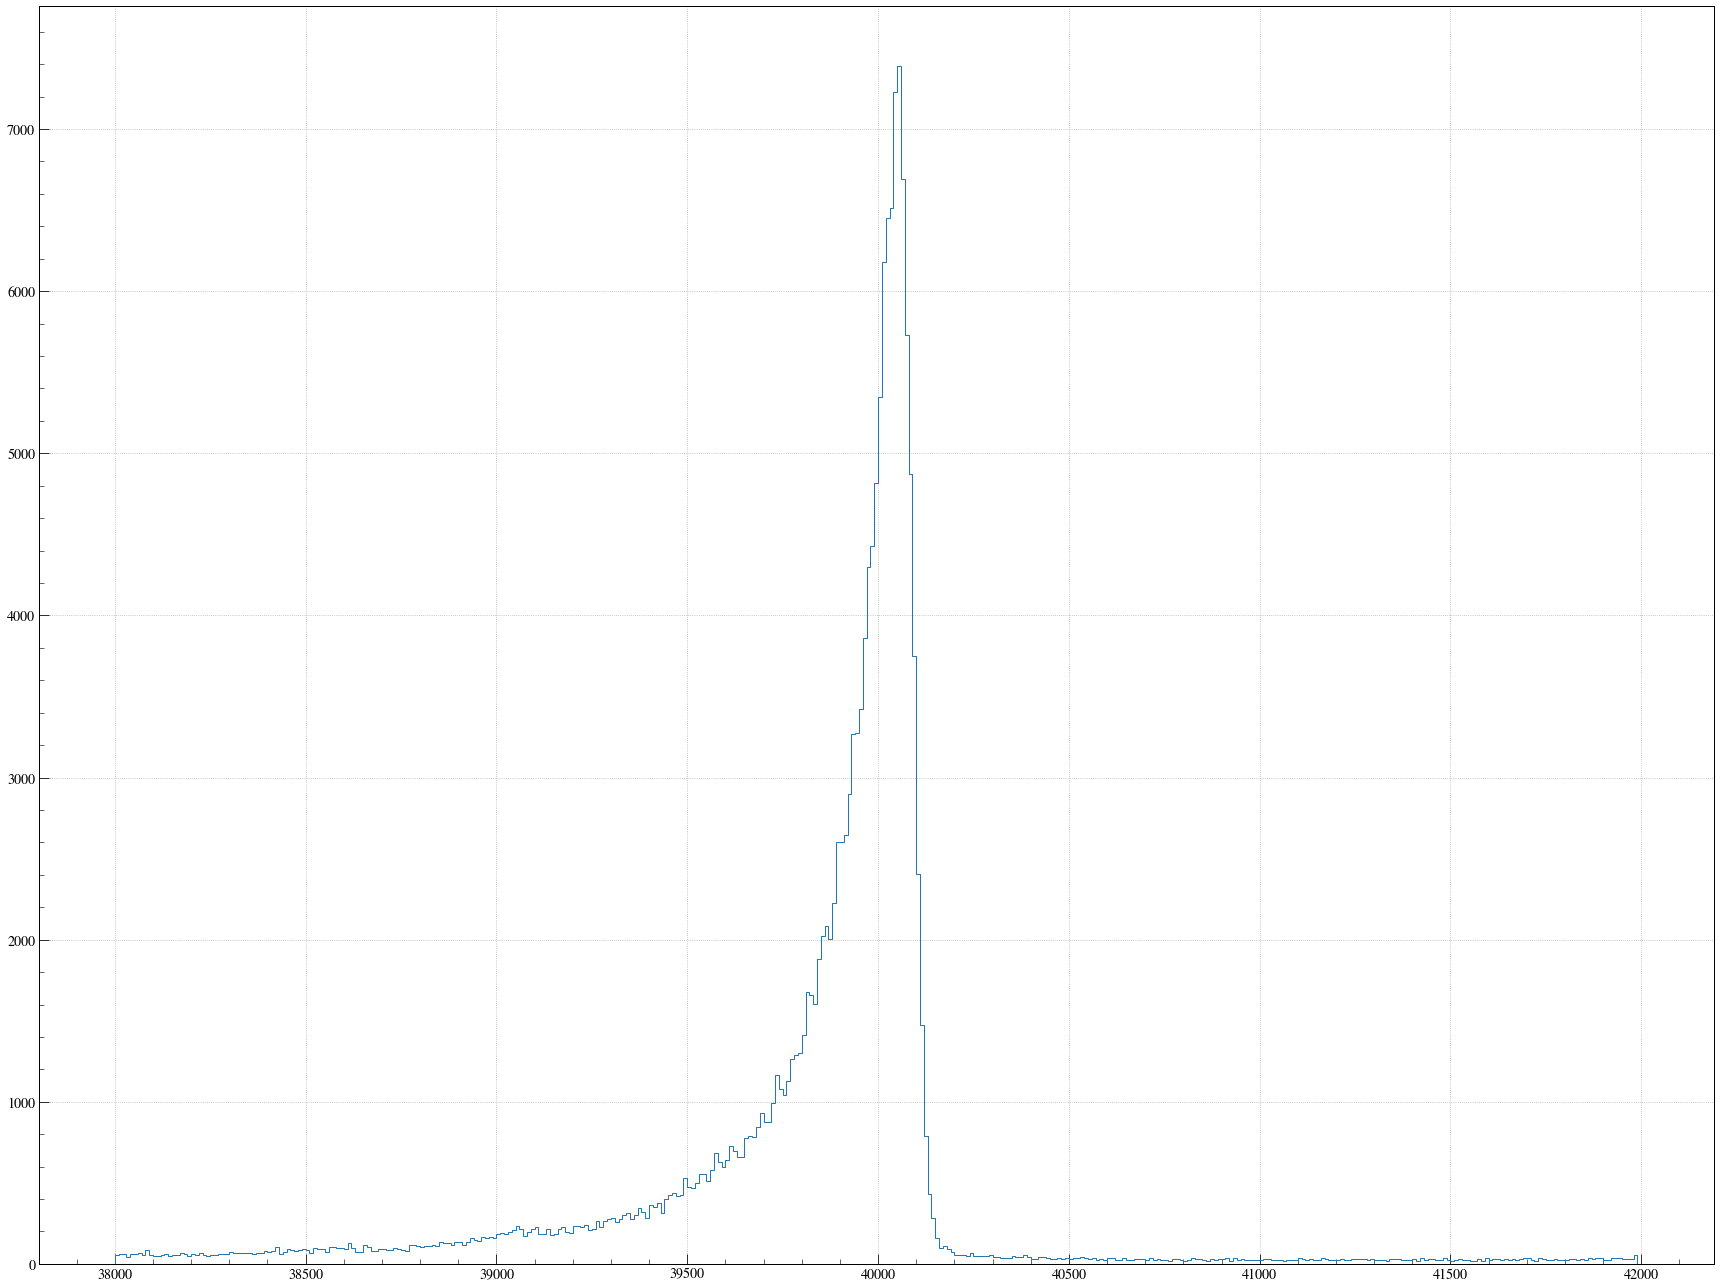

In [27]:
plt.rcParams['figure.figsize'] = (24,18)
trapEmax_cal_range = [0,50] #keV
ene_cut_kr = (df_hit_kr['trapEmax_cal']>trapEmax_cal_range[0]) & (df_hit_kr['trapEmax_cal']<trapEmax_cal_range[1])

n = plt.hist(df_hit_kr['triEargmax'][ene_cut_kr], bins=range(38000,42000,10), histtype='step')
print(str())

print('Contains {:.1f}'.format(n[0].sum()/ene_cut_kr.sum()*100)+'%')

### triEargmax trigger walk

9946
7696
6788
6784
5898


Text(0.5, 0, 'time (ns)')

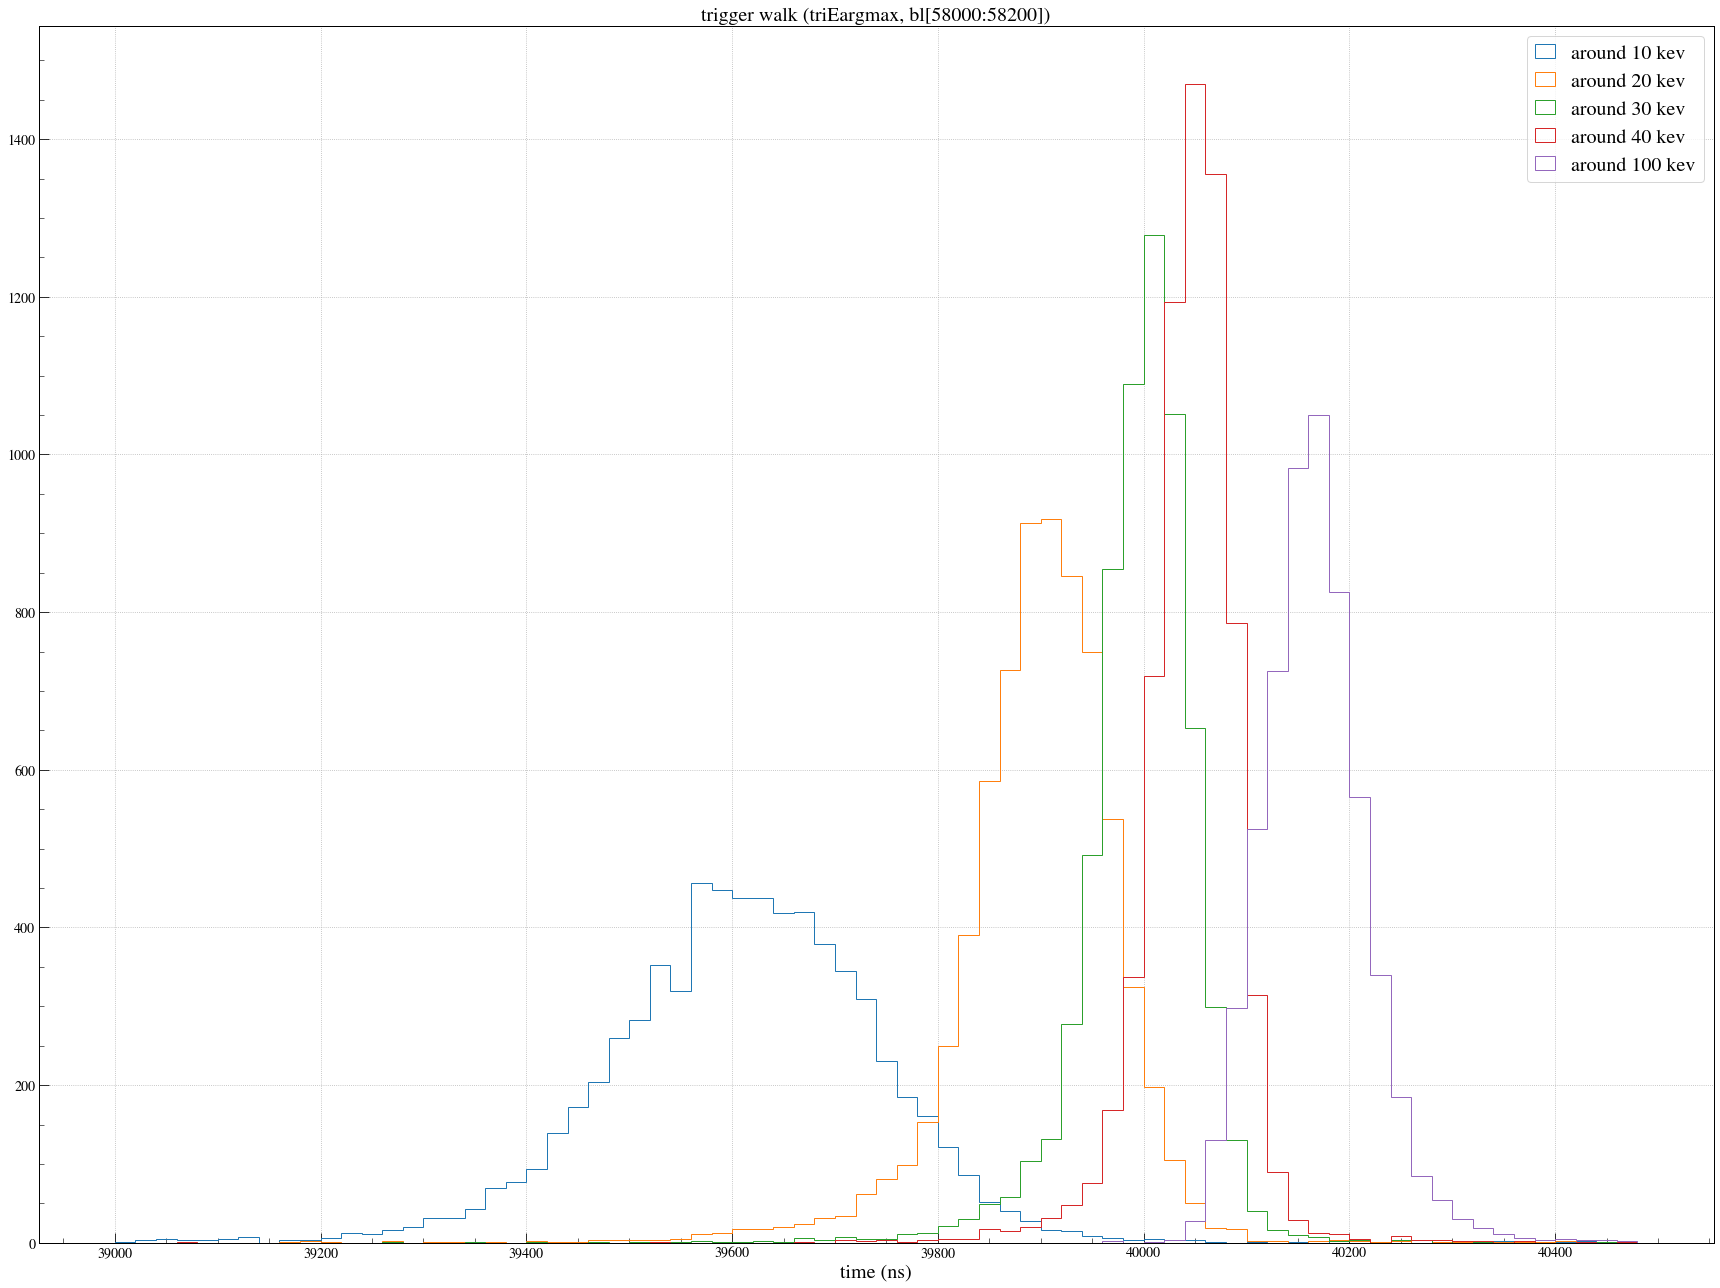

In [28]:
E_ranges=[(9,11,'around 10 kev'), 
          (19,21,'around 20 kev'),
          (29,31,'around 30 kev'),
          (39,41, 'around 40 kev'),
          (99,100, 'around 100 kev')
         ]
for e_range in E_ranges:
    cut = (df_hit_kr['trapEmax_cal']>e_range[0]) & (df_hit_kr['trapEmax_cal']<e_range[1]) & bl_cut_kr
    plt.hist(df_hit_kr['triEargmax'][cut], bins=range(39000,40500,20), histtype='step', label=e_range[2])
    print(cut.sum())
    

plt.style.use('/global/u2/f/fnafis/nfuad.mpl')
plt.legend()
plt.title('trigger walk (triEargmax, bl[58000:58200])')
plt.xlabel('time (ns)')


## trapEargmax


Contains 100.0%


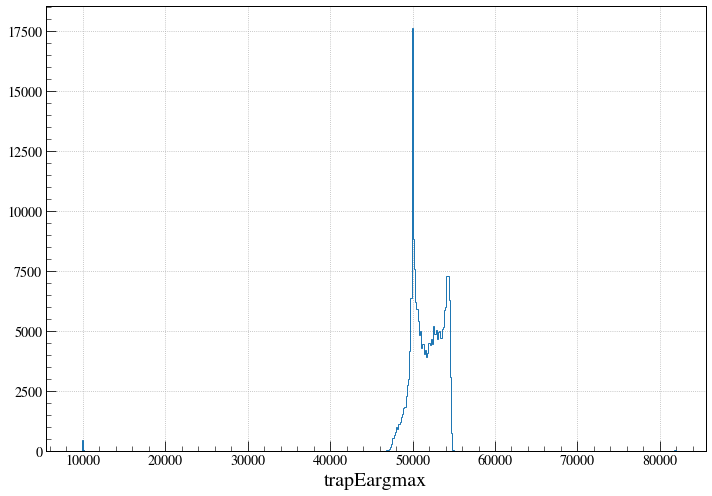

In [29]:
#plt.rcParams['figure.figsize'] = (24,18)
trapEmax_cal_range = [0,50] #keV
ene_cut_kr = (df_hit_kr['trapEmax_cal']>trapEmax_cal_range[0]) & (df_hit_kr['trapEmax_cal']<trapEmax_cal_range[1])
#plt.style.use('/global/u2/f/fnafis/nfuad.mpl')
n = plt.hist(df_hit_kr['trapEargmax'][ene_cut_kr & bl_cut_kr], bins=500, histtype='step')
plt.xlabel('trapEargmax')
print(str())

print('Contains {:.1f}'.format(n[0].sum()/(ene_cut_kr & bl_cut_kr).sum()*100)+'%')
#plt.xlim(80000,)

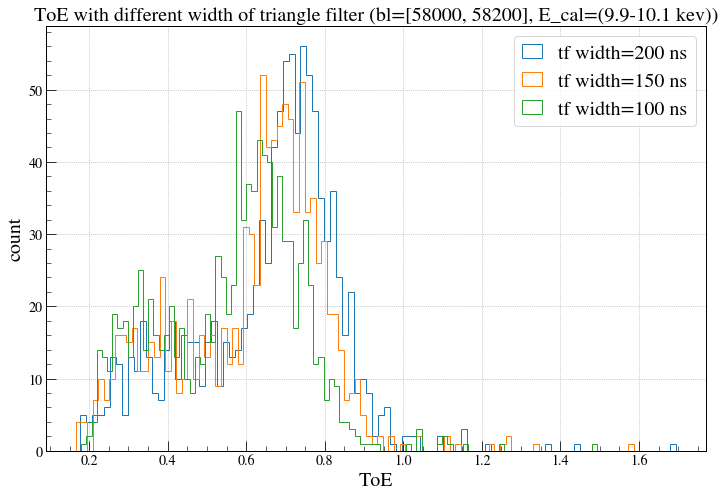

In [48]:
df_hit_kr['ToE_200_windowed'][(df_hit_kr['trapEmax_cal']>9.9) & (df_hit_kr['trapEmax_cal']<10.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=200 ns')
df_hit_kr['ToE_150_windowed'][(df_hit_kr['trapEmax_cal']>9.9) & (df_hit_kr['trapEmax_cal']<10.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=150 ns')
df_hit_kr['ToE_windowed'][(df_hit_kr['trapEmax_cal']>9.9) & (df_hit_kr['trapEmax_cal']<10.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=100 ns')
plt.title('ToE with different width of triangle filter (bl='+str(bl_range)+', E_cal=(9.9-10.1 kev))')
plt.xlabel('ToE')
plt.ylabel('count')
plt.legend()

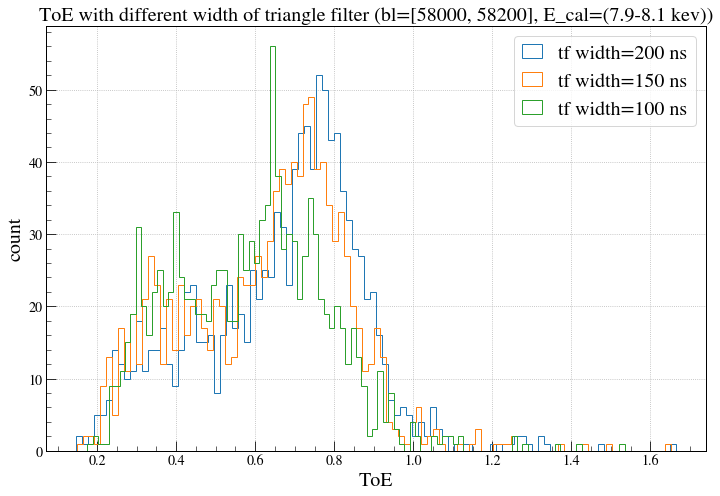

In [49]:
df_hit_kr['ToE_200_windowed'][(df_hit_kr['trapEmax_cal']>7.9) & (df_hit_kr['trapEmax_cal']<8.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=200 ns')
df_hit_kr['ToE_150_windowed'][(df_hit_kr['trapEmax_cal']>7.9) & (df_hit_kr['trapEmax_cal']<8.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=150 ns')
df_hit_kr['ToE_windowed'][(df_hit_kr['trapEmax_cal']>7.9) & (df_hit_kr['trapEmax_cal']<8.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=100 ns')
plt.title('ToE with different width of triangle filter (bl='+str(bl_range)+', E_cal=(7.9-8.1 kev))')
plt.xlabel('ToE')
plt.ylabel('count')
plt.legend()

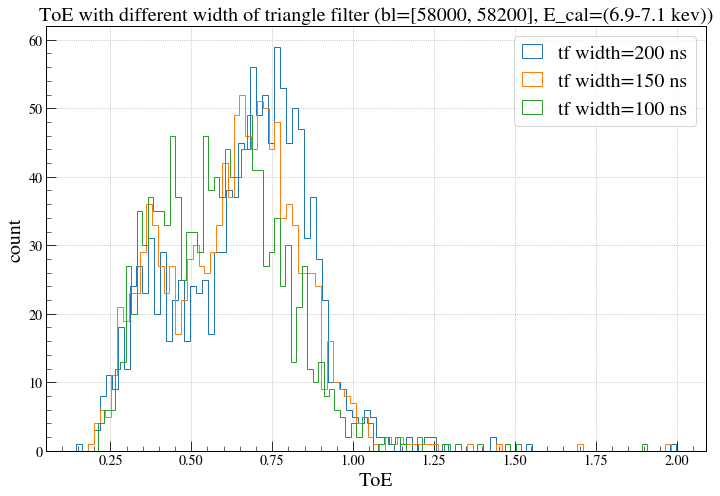

In [50]:
df_hit_kr['ToE_200_windowed'][(df_hit_kr['trapEmax_cal']>6.9) & (df_hit_kr['trapEmax_cal']<7.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=200 ns')
df_hit_kr['ToE_150_windowed'][(df_hit_kr['trapEmax_cal']>6.9) & (df_hit_kr['trapEmax_cal']<7.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=150 ns')
df_hit_kr['ToE_windowed'][(df_hit_kr['trapEmax_cal']>6.9) & (df_hit_kr['trapEmax_cal']<7.1) & bl_cut_kr].hist(bins=100, histtype='step', label='tf width=100 ns')
plt.title('ToE with different width of triangle filter (bl='+str(bl_range)+', E_cal=(6.9-7.1 kev))')
plt.xlabel('ToE')
plt.ylabel('count')
plt.legend()

27339
22602
6867
6871
5985


Text(0.5, 1.0, 'trigger walk (trapEargmax)')

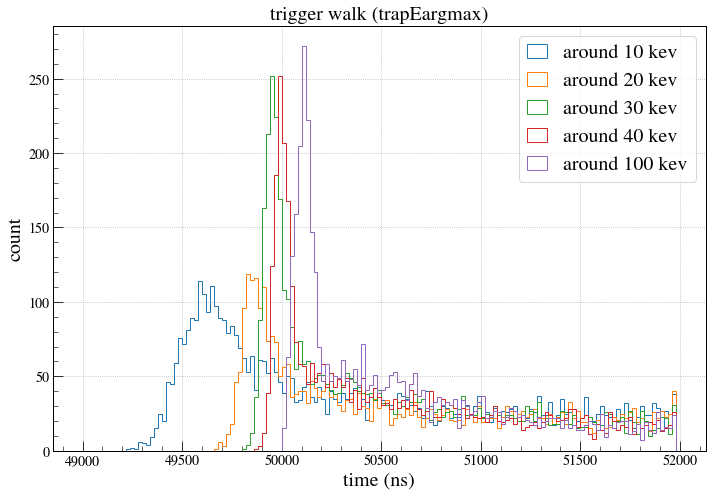

In [33]:
E_ranges=[(9,11,'around 10 kev'), 
          (19,21,'around 20 kev'),
          (29,31,'around 30 kev'),
          (39,41, 'around 40 kev'),
          (99,100, 'around 100 kev')
         ]

for e_range in E_ranges:
    cut = (df_hit_kr['trapEmax_cal']>e_range[0]) & (df_hit_kr['trapEmax_cal']<e_range[1])
    plt.hist(df_hit_kr['trapEargmax'][cut], bins=range(49000,52000,20), histtype='step', label=e_range[2])
    print(cut.sum())
plt.legend()
plt.xlabel('time (ns)')
plt.ylabel('count')
plt.title('trigger walk (trapEargmax)')

Processing parameters: ['bl, bl_sig, bl_slope, bl_int', 'wf_blsub', 'wf_pz', 'wf_trap']
Required input parameters: ['waveform']
Copied output parameters: []
Processed output parameters: ['wf_trap']
['bl, bl_sig, bl_slope, bl_int', 'wf_blsub', 'wf_pz', 'wf_trap']
Database lookup: using default value of 74.00*us for db.pz2.tau1
Database lookup: using default value of 6.4*us for db.pz2.tau2
Database lookup: using default value of 0 for db.pz2.frac
ene_cut_kr: 22602


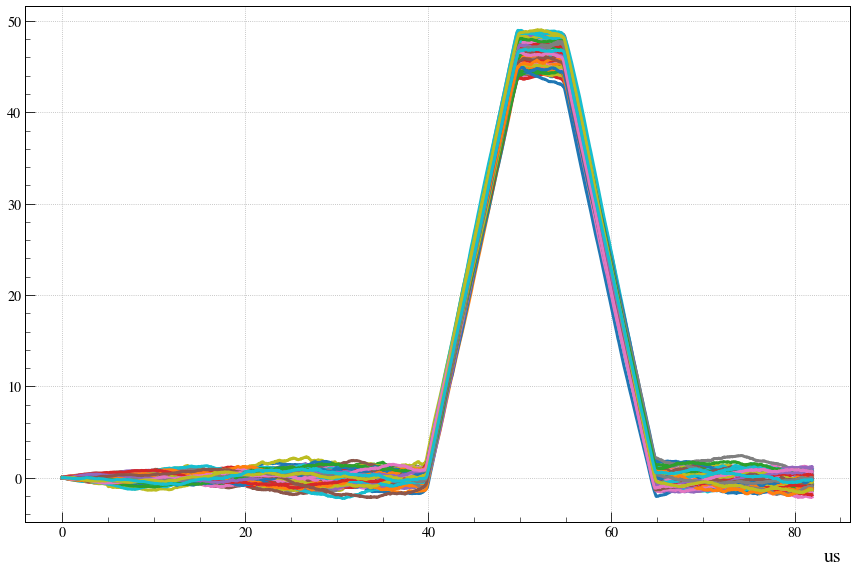

In [34]:
nwfs = 100
browser_kr = WaveformBrowser(raw_files, tb_name_raw,
                             dsp_config=os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json'),
                             x_unit='us',
                             #legend= legend,
                             waveforms=['wf_trap'],
                             #x_lim=(38,41)
                            )


trapEmax_cal_range = [19,21] #keV

ene_cut_kr = (df_hit_kr['trapEmax_cal']>trapEmax_cal_range[0]) & (df_hit_kr['trapEmax_cal']<trapEmax_cal_range[1])

print('ene_cut_kr:',ene_cut_kr.sum())
cut = ene_cut_kr & bl_cut_kr
cut_indices = list(compress(list(range(len(cut))),cut))
entries_kr = np.random.choice(cut_indices, size=nwfs).tolist()
#plt.title('kr')
plt.rcParams['figure.figsize'] = (12,8)
browser_kr.draw_entry(entries_kr)

In [35]:
argmaxes_around_20 = []
for i in range(100):
    argmaxes_around_20.append(np.argmax(browser_kr.wf_data[0][i][1]))

100.0

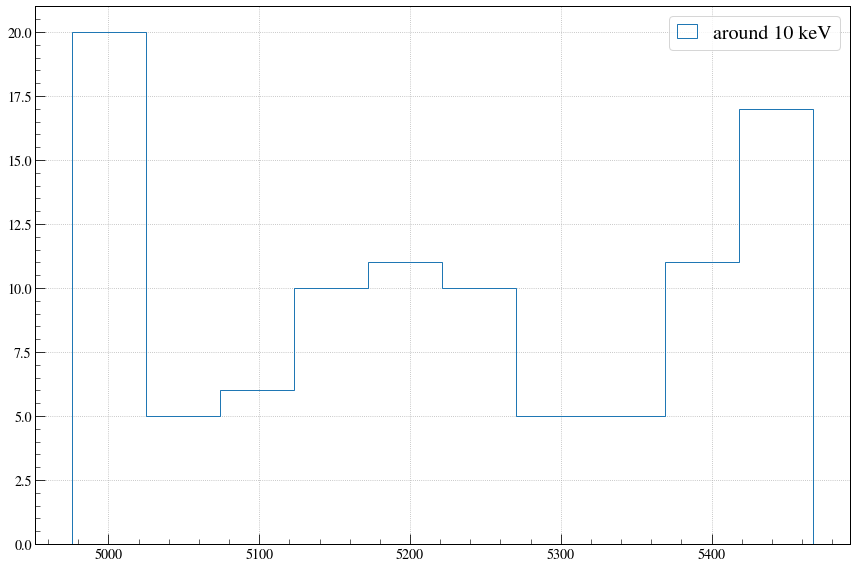

In [36]:
n = plt.hist(argmaxes_around_20, histtype='step', label='around 10 keV')

plt.legend()
n[0].sum()

In [37]:
n1 = plt.hist(argmaxes_around_40, bins=range(3950,4050,2), histtype='step', label='around 40 keV')
n2 = plt.hist(argmaxes_around_30, bins=range(3950,4050,2), histtype='step', label='around 30 keV')
n3 = plt.hist(argmaxes_around_20, bins=range(3950,4050,2), histtype='step', label='around 20 keV')
n4 = plt.hist(argmaxes_around_10, bins=range(3950,4050,2), histtype='step', label='around 10 keV')
n5 = plt.hist(argmaxes_around_100, bins=range(3950,4050,2), histtype='step', label='around 100 keV')

print(sum(n1[0]), sum(n2[0]), sum(n3[0]), sum(n4[0]))

plt.title('argmaxes of wf_triangle in Kr runs (run 3) showing trigger walk')
plt.xlabel('time (ns)')
plt.legend()

NameError: name 'argmaxes_around_40' is not defined

In [ ]:
nwave = 1
wf_triangle_kr = browser_kr.wf_data[1][nwave][1]
wf_blsub_kr = browser_kr.wf_data[0][nwave][1]
plt.plot(time, wf_blsub_kr)
plt.plot(time, wf_triangle_kr)

np.argmax(wf_triangle_kr)

In [ ]:
dsp_config_file = os.path.expandvars('$HOME/KrSTC/data/meta/config_dsp.json')
browser = WaveformBrowser(raw_files, tb_name_raw, dsp_config=dsp_config_file,
                         waveforms=['wf_trap'],
                         #lines=['trapEmax', 'tp_0'],
                         x_unit='us',
                         #x_lim=(35,45),
                         legend=legend)

browser.draw_entry(entries)

In [ ]:
browser.draw_next()

In [ ]:
import importlib as imp
imp.reload(pygama.dsp.WaveformBrowser.WaveformBrowser)

In [ ]:
run = '3'
cyc = 2039
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'


raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'


browser_bkg = WaveformBrowser(raw_files, tb_name_raw,
                             x_unit='us',
                            legend= legend)

#entries = np.random.choice(cut, size=nwfs).tolist()
entries = [0,5,9]
#plt.title('bkg')
plt.rcParams['figure.figsize'] = (7,5)
browser_bkg.draw_entry(entries)
plt.xlim(35,45)

In [ ]:
'''
run = '2'

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_bkg[0],cycle_range_bkg[0]+5):
    
    
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')




run = '2'
cyc = 2028

#raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
#dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'

raw_store = lh5.Store()    
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files, idx=np.asarray(ene_toe_cut_bkg))
bulk_wfs_bkg = data_raw['waveform']['values'].nda


clockticks = np.arange(0, bulk_wfs_bkg.shape[1], 1)
time = clockticks/100 #in us




'''


In [ ]:
plt.plot(time, bulk_wfs_bkg[5])

In [ ]:
'''
n_wfs=3


#cut = ene_bl_toe_cut_bkg
cut = ene_bl_triemax_cut_bkg


draw_canvas(plt, xlabel='time (us)', ylabel='ADC', title='bkg,ene:'+str(trapEmax_cal_range)+'bl:'+str(bl_range)+'triemax:'+str(triemax_range))
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs_bkg[cut[i]],51,1)
    label = str(df_hit_bkg['trapEmax_cal'][cut[i]])+', '+str(df_hit_bkg['bl'][cut[i]])+', '+str(df_hit_bkg['triEmax'][cut[i]])
    plt.plot(time, wf_filtered, label=label)
    plt.xlim(30,50)
plt.legend(fontsize=fontsize)



'''

### kr

In [ ]:


'''

run = '3'

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_kr[0],cycle_range_kr[1]+1):
    
    
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')





run = '3'
cyc = 2039

raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'

raw_store = lh5.Store()

tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files)

bulk_wfs_kr = data_raw['waveform']['values'].nda

clockticks = np.arange(0, bulk_wfs_kr.shape[1], 1)
time = clockticks/100 #in us


'''

In [ ]:
run = '3'
cut = ene_bl_toe_cut_kr
nwfs = 3
legend = (df_hit_kr['trapEmax_cal'], df_hit_kr['bl'], df_hit_kr['ToE'])

raw_files = []
dsp_files = []

for cyc in np.arange(cycle_range_kr[0],cycle_range_kr[1]+1):
    raw_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5')
    dsp_files.append('/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5')

#run = '3'
#cyc = 2039

#raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_run'+run+'_cyc'+str(cyc)+'_raw.lh5'
#dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run'+run+'_cyc'+str(cyc)+'_dsp.lh5'



browser_kr = WaveformBrowser(raw_files, tb_name_raw,
                             x_unit='us',
                            legend= legend)





entries = np.random.choice(cut, size=nwfs).tolist()

plt.rcParams['figure.figsize'] = (12,10)
browser_kr.draw_entry(entries)
plt.xlim(38.5,40.5)

In [ ]:
'''
n_wfs=3

#cut = list(set(ene_cut_bkg) & set(bl_cut_bkg))
#cut.sort()
#cut = ene_bl_toe_cut_kr
cut = ene_bl_triemax_cut_kr

draw_canvas(plt, xlabel='time (us)', ylabel='ADC', title='ene:'+str(trapEmax_cal_range)+'bl:'+str(bl_range)+'triemax:'+str(triemax_range))
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs_kr[cut[i]],51,1)
    label = str(df_hit_kr['trapEmax_cal'][cut[i]])+', '+str(df_hit_kr['bl'][cut[i]])+', '+str(df_hit_kr['triEmax'][cut[i]])
    plt.plot(time,wf_filtered, label=label)
    plt.xlim(30,50)
plt.legend(fontsize=fontsize)


'''


